In [1]:
#import statements

#standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#standard sklearn imports
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#sklearn algorithms
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',50)
pd.set_option('display.max_colwidth', -1)

In [3]:
trainTest = pd.read_csv('trainTest.csv',low_memory = False)

In [4]:
train = trainTest[trainTest['dataType'] == 'train'].copy()
test = trainTest[trainTest['dataType'] == 'test'].copy()

In [6]:
train.status_group.head()

0    functional    
1    functional    
2    functional    
3    non functional
4    functional    
Name: status_group, dtype: object

In [7]:
#load label encoder
le = preprocessing.LabelEncoder()

In [8]:
#apply label encoder to train data
train = train.apply(le.fit_transform)

#apply label encoder to test data
#test = test.apply(le.fit_transform)

In [9]:
train.status_group.head()

0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int64

In [14]:
tel = {'jack': 4098, 'sape': 4139}

In [16]:
tel['jack']

4098

In [21]:
status_group_labels = {0:'functional',
                       1:'functional needs repair',
                       2:'nonfunctional'}

In [22]:
#create target variable for validation
target = train.status_group

#remove target variable from train
train = train.drop(['status_group','dataType'],axis =1)

In [23]:
#create training & test data for validation
xTrain, xTest, yTrain, yTest = train_test_split(train,target, test_size = .3)

#splits data set into 2 groups of 2 groups

#Group 1: train & test
#Group 2: x & y

#Group 1:
#train has 70% of the data according to test_size and test has the remaining 30%
#train is what you use to fit the model
#test is what you validate it on

#Group 2:
#x entire data frame to train the model 
#y the target variables for the model 

# xTrain inputs for determining yTrain to fit the model
# yTest inputs for trying to predict yTest to validate the model

In [24]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(41580, 36) (41580,)
(17820, 36) (17820,)


In [25]:
#import tree
clf_tree = tree.DecisionTreeClassifier()
clf_rnf = RandomForestClassifier()

In [26]:
#fit model
model_tree = clf_tree.fit(xTrain,yTrain)
model_rnf = clf_rnf.fit(xTrain,yTrain)

In [27]:
#make predictions
predictions_tree = model_tree.predict(xTest)
predictions_rnf = model_rnf.predict(xTest)

In [28]:
#contains a list of predictions for the model
print(predictions_tree[0:30])
print(predictions_rnf[0:30])

[2 2 0 0 0 2 2 0 0 0 0 0 0 2 2 2 2 0 2 2 0 2 0 0 2 2 0 0 0 0]
[2 2 0 0 0 0 2 0 2 0 0 1 0 2 2 2 2 0 0 0 0 2 0 0 2 0 0 0 0 0]


In [29]:
model_dif = (predictions_tree == predictions_rnf)

In [30]:
model_dif.tolist().count(False)
#number of instances where rnf disagrees with decision tree

2864

In [31]:
model_dif.tolist().count(False)/len(model_dif)
#a little more than 14% of the data

0.16071829405162738

In [32]:
#accuracy score import
from sklearn.metrics import accuracy_score

#print(tree_model.score(xTest,yTest))
#for the tree model, here is how well you predict yTest, given inputs of xTest

#print(accuracy_score(yTest,predictions))
#here is how the actual values of yTest compare with your predictions

In [33]:
print(accuracy_score(yTest,predictions_tree))
print(accuracy_score(yTest,predictions_rnf))
#find that Random Forest is more accurate
#also seems that rnf changes a little bit

0.751122334456
0.788383838384


In [35]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [36]:
#confusion matrix
#diagonals are correct predictions
#off diagonals are false positives/false negatives

cm = confusion_matrix(yTest,predictions_rnf)
print(cm)

[[8483  286  942]
 [ 692  466  189]
 [1489  173 5100]]


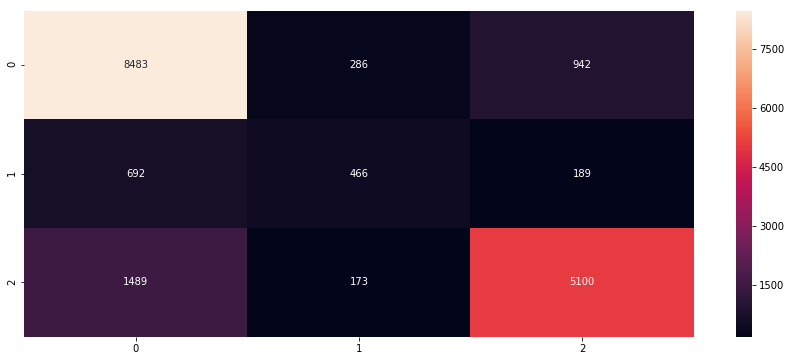

In [40]:
plt.rcParams['figure.figsize']=(15,6)
sns.heatmap(cm, annot=True, fmt='g')
#lighter the color, the more right it is
#biggest problem: incorrect classification of functional(0) as nonfunctional(2)
#2nd biggest: incorrect nonfunctional(2) as functional(0)
#3rd problems classification of functional needs repair 

In [38]:
status_group_labels

{0: 'functional', 1: 'functional needs repair', 2: 'nonfunctional'}

In [ ]:
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
#https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn#step-4

In [41]:
#Cross Validation
from sklearn.model_selection import KFold # import KFold

In [ ]:
#look at this to try and explore kfolds tutorial
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

In [ ]:
#need to split it out ahead of time

"""
>>> import numpy as np
>>> X_folds = np.array_split(X_digits, 3) #inputs
>>> y_folds = np.array_split(y_digits, 3) #outputs
>>> scores = list()
>>> for k in range(3):
...     # We use 'list' to copy, in order to 'pop' later on
...     X_train = list(X_folds)
...     X_test  = X_train.pop(k)
...     X_train = np.concatenate(X_train)
...     y_train = list(y_folds)
...     y_test  = y_train.pop(k)
...     y_train = np.concatenate(y_train)
...     scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
>>> print(scores)
[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]
"""